In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, 
columns=boston_dataset.feature_names)

boston['MEDV'] = boston_dataset.target
boston['MEDV']

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [36]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [37]:
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Correlation Matrix

To understand the relationship among features (columns), a correlation matrix is very useful in the exploratory data analysis. Correlation measures linear relationships between variables. We can construct a correlation matrix to show correlation coefficients between variables. It is symmetric where each element is a correlation coefficient ranging from -1 and 1. A value near 1 (resp. -1) indicates a strong positive (resp. negative) correlation between variables. We can create a correlation matrix using the "corr" function:

In [38]:
corr_matrix = boston.corr().round(2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

The last row or column is used to identify features that are most correlated with the target MEDV (median value of owner-occupied homes in $1000’s). LSTAT (percentage of lower status of the population) is most negatively correlated with the target (-0.74) which means that as the percentage of lower status drops, the median house values increases; while RM (the average number of rooms per dwelling) is most positively correlated with MEDV (0.70) which means that the house value increases as the number of rooms increases.

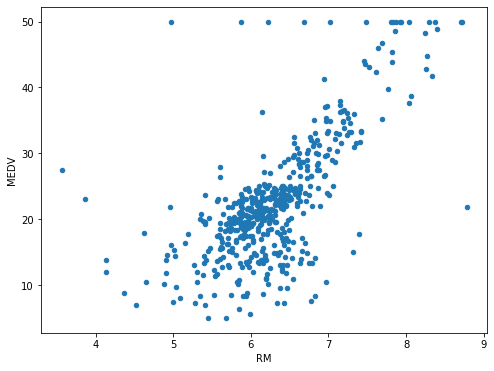

In [39]:
boston.plot(kind = 'scatter',
  x = 'RM',
  y = 'MEDV',
  figsize=(8,6));

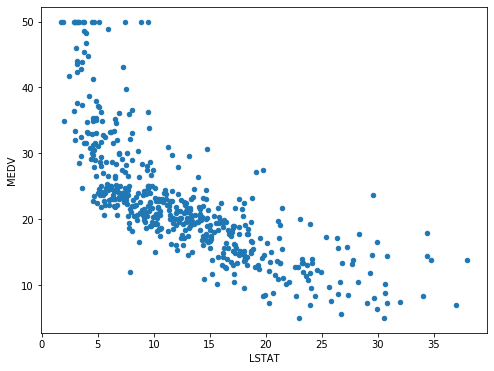

In [40]:
boston.plot(kind = 'scatter',
  x = 'LSTAT',
  y = 'MEDV',
  figsize=(8,6));

In scikit-learn, models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a one-dimensional target array (Y).

Here we define the feature matrix as the column RM in boston and assign it to X. Note the double brackets around 'RM' in the code below, it is to ensure the result remains a DataFrame, a 2-dimensional data structure:

In [42]:
X = boston[['RM']]
Y = boston['MEDV']
print(X.shape)
print(Y.shape)

(506, 1)
(506,)


Recall that the single bracket outputs a Pandas Series, while a double bracket outputs a Pandas DataFrame, and the model expects the feature matrix X to be a 2darray

# Train Test Split

In [48]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,
                                                      test_size = 0.3 , 
                                                      random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 1)
(152, 1)
(354,)
(152,)


# Fitting Model

In [49]:
model = LinearRegression()
model.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print('Intercept: ' , model.intercept_.round(2))
print('Slope: ' , model.coef_.round(2))

Intercept:  -30.57
Slope:  [8.46]


# Prediction

In [56]:
new_RM = np.array([6.5]).reshape(-1,1) # make sure it's 2d
model.predict(new_RM)

array([24.42606323])

When the average number of rooms per dwelling is 6.5, the model predicts a home value of $24,426.06.

Note that the input has to be 2-dimensional, either a 2darray or DataFrame will work in this case.

This value is the same as we plug in the line b + m*x where b is the estimated intercept from the model, and m is the estimated slope.

The predict() method estimates the median home value by computing model.intercept_ + model.coef_*RM

In [57]:
model.intercept_ + model.coef_*6.5

array([24.42606323])

In [55]:
y_test_predicted = model.predict(X_test)
print(y_test_predicted.shape)
print(type(y_test_predicted))

(152,)
<class 'numpy.ndarray'>


# Evaluating

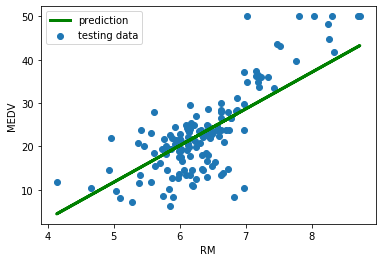

In [59]:
plt.scatter(X_test, Y_test, 
  label='testing data');
plt.plot(X_test, y_test_predicted,
  label='prediction', color = 'green' ,linewidth=3)
plt.xlabel('RM'); plt.ylabel('MEDV')
plt.legend(loc='upper left')
plt.show()

Some points sit on the line, but some are away from it. We can measure the distance between a point to the line along the vertical line, and this distance is referred to as residual or error. A residual is the difference between the observed value of the target and the predicted value. The closer the residual is to 0, the better job our model is doing.

We can calculate a residual and represent it in a scatter plot.

Residuals are scattered around the horizontal line, y = 0, with no particular pattern. This seemingly random distribution is a sign that the model is working. Ideally the residuals should be symmetrically and randomly spaced around the horizontal axis; if the residual plot shows some pattern, linear or nonlinear, that’s an indication that our model has room for improvement

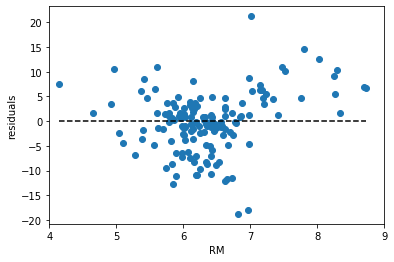

In [60]:
residuals = Y_test - y_test_predicted

# plot the residuals
plt.scatter(X_test, residuals)
# plot a horizontal line at y = 0
plt.hlines(y = 0, 
  xmin = X_test.min(), xmax=X_test.max(),
  linestyle='--')
# set xlim
plt.xlim((4, 9))
plt.xlabel('RM'); plt.ylabel('residuals')
plt.show()

In [64]:
print(residuals.mean())
print((residuals**2).mean())
print(mean_squared_error(Y_test, y_test_predicted))

-0.23645087766388564
36.5172147308386
36.517214730838624


In general, the smaller the MSE, the better, yet there is no absolute good or bad threshold. We can define it based on the dependent variable, i.e., MEDV in the test set. Y_test ranges from 6.3 to 50 with a variance 92.26. Compared to the total variance, a MSE of 36.52 is not bad.

In [65]:
#To calculate R score
model.score(X_test, Y_test)

0.6015774471545623

In [73]:
#What R score actually is
a = ((Y_test-Y_test.mean())**2).sum()
b = (residuals**2).sum()
r_score = 1 - (b/a)
r_score

0.6015774471545623

It is the proportion of total variation explained by the model. Here, around 60% of variability in the testing data is explained by our model.

A perfect model explains all the variation in the data. Note R-squared is between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean while 100% indicates that the model explains all of it.

# Multivariate LinearRegression

In [74]:
## data preparation
X2 = boston[['RM', 'LSTAT']]
Y = boston['MEDV']
## train test split
## same random_state to ensure the same splits
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y,
  test_size = 0.3,
  random_state=1)
model2 = LinearRegression()
model2.fit(X2_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print(model2.intercept_)
print(model2.coef_)

5.316818471096038
[ 4.12674118 -0.67762654]


In [77]:
y_test_predicted2 = model2.predict(X2_test)

In [78]:
mean_squared_error(Y_test, y_test_predicted2).round(2)

28.93